confidence:  0.9892497004875647
predicted_data: 
[1161.91691285 1164.52009957 1170.70137164 1166.78103466 1170.74285669
 1178.69761453 1168.17078375 1179.16432132 1171.47921628 1167.7766758
 1181.44599893 1198.73489244 1229.68273783 1239.87768824 1237.56489684
 1204.03460725 1220.08932061 1205.15470353 1175.70031986 1183.60322139
 1194.78344168 1202.4996605  1204.79170937 1211.96862258 1207.98605802
 1207.00078815 1217.50687641 1222.56805219 1234.43277576 1231.11397197]
actual_data: 
[1187.38, 1177.62, 1174.76, 1168.36, 1176.76, 1182.26, 1186.1, 1169.47, 1189.01, 1204.2, 1209.59, 1229.14, 1246.87, 1252.7, 1254.33, 1276.68, 1305.2, 1304.86, 1295.0, 1293.32, 1294.58, 1327.31, 1362.54, 1357.51, 1377.95, 1402.05]


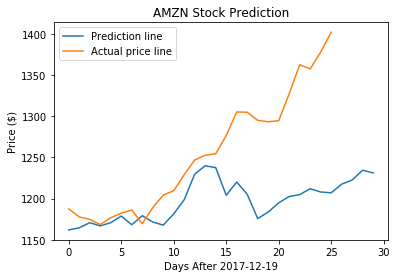

In [2]:
import quandl
import pandas as pd
import numpy as np
import datetime
import api_file as api
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm

apiKey = api.getApiKey()

endDate = '2017-12-19'

#next is getting user input and making more dynamic
user_input = "AMZN"
stock_to_analyze = "WIKI/" + user_input

df = quandl.get(stock_to_analyze, end_date=endDate, api_key=apiKey)
df = df[['Adj. Close']]

forecast_out = int(30)

real_data = quandl.get(stock_to_analyze, start_date=endDate, end_date='2018-1-27')
real_data = real_data[['Adj. Close']]
real_data = real_data['Adj. Close'].values.tolist()


df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print("predicted_data: ")
print(forecast_prediction)
print("actual_data: ")
print(real_data)

plt.plot(forecast_prediction, label='Prediction line')
plt.plot(real_data, label = 'Actual price line')
plt.legend()
plt.axis('auto')
plt.title(user_input + " Stock Prediction")
plt.xlabel('Days After ' + endDate)
plt.ylabel('Price ($)')
plt.show()
